In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from matplotlib.animation import FuncAnimation

In [3]:
v0 = 1
m = 1
KbT = (1/3)*m*v0**2
N = int(1e5)

In [4]:
def mb(v):
    return (m/(2*np.pi*KbT))**(3/2)*4*np.pi*v**2*np.exp(-m*v**2/(2*KbT))

In [5]:
def energy(prtcls):
    return np.sum(0.5 * m * (prtcls[:, 0]**2 + prtcls[:, 1]**2 + prtcls[:, 2]**2))

def momentum(prtcls):
    return m * np.sum(prtcls, 0)

def velocity(prtcls):
    return np.sqrt(prtcls[:, 0]**2 + prtcls[:, 1]**2 + prtcls[:, 2]**2)

In [6]:
def rand_v(v):
    phi = 2*np.pi*random()
    theta = np.arccos(2*random() - 1)
    return (v*np.sin(theta)*np.cos(phi), v*np.sin(theta)*np.sin(phi), v*np.cos(theta))

In [7]:
def init(N):
    prtcls = np.zeros((N,3))

    for i in range(N):
        prtcls[i][0], prtcls[i][1], prtcls[i][2] = rand_v(v0)

    return prtcls

In [8]:
def collide(prtcls):
    prt1 = int(np.round((N-1)*random()))
    prt2 = int(np.round((N-1)*random()))
    while prt1 == prt2:
        prt2 = int(np.round((N-1)*random()))
    
    v1 = prtcls[prt1]
    v2 = prtcls[prt2]

    vcm = 0.5*(v1 + v2)
    v1_c = v1 - vcm
    v2_c = v2 - vcm

    v1_c_new = np.array(rand_v(np.sqrt(np.sum(v1_c**2))))
    v2_c_new = -v1_c_new

    v1_new = v1_c_new + vcm
    v2_new = v2_c_new + vcm

    prtcls[prt1] = v1_new
    prtcls[prt2] = v2_new


In [142]:
prtcls = init(N)
M = np.round(np.logspace(2,5,100))

print(energy(prtcls))
print(momentum(prtcls))

def calc_mb(m):
    for i in range(int(m)):
        collide(prtcls)
    return np.array(prtcls)

prtcls_m = np.zeros((len(M),) + prtcls.shape)
for i in range(len(M)):
    prtcls_m[i] = calc_mb(M[i])
    


500.0
[ 34.23115259 -49.52073936  -4.88761927]


In [9]:
prtcls = init(N)

M = 500000
step = 500

print(energy(prtcls))
print(momentum(prtcls))

def collide_step():
    for i in range(step):
        collide(prtcls)
    return np.array(prtcls)

prtcls_m = np.zeros((int(M/step),) + prtcls.shape)
for i in range(int(M/step)):
    prtcls_m[i] = collide_step()
    
print(energy(prtcls_m[-1]))
print(momentum(prtcls_m[-1]))


50000.0
[180.74694112  12.8495843   61.11517717]
50000.00000000001
[180.74694112  12.8495843   61.11517717]


In [136]:
mb_high = calc_mb(1e6)

/tmp/ipykernel_495/3317038871.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


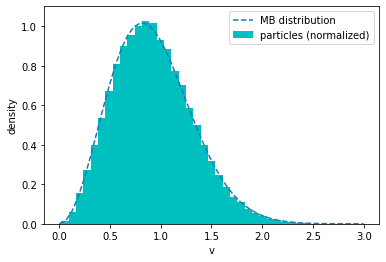

In [11]:
v = np.linspace(0,3)

fig, ax = plt.subplots()
ax.clear()
ax.plot(v, mb(v), '--', label='MB distribution')
ax.hist(velocity(prtcls_m[-1]), bins=40, density=True, color='c', label='particles (normalized)')
ax.set_ylim(top=1.1)
ax.set_xlabel('v')
ax.set_ylabel(r'density')
ax.legend()
fig.savefig('figures/mb.png', dpi=120)
fig.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
/tmp/ipykernel_851/2425974742.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


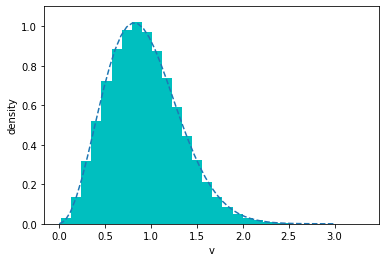

In [157]:
v = np.linspace(0,3)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.plot(v, mb(v), '--')
    ax.hist(velocity(prtcls_m[i]), bins=30, density=True, color='c')
    ax.set_ylim(top=1.1)
    ax.set_xlabel('v')
    ax.set_ylabel(r'density')

ani = FuncAnimation(fig, animate, frames=len(prtcls_m), interval=50, repeat=False)
ani.save('animations/mb.gif')
fig.show()



In [156]:
len(prtcls_m)

1000